In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style='darkgrid')

In [3]:
buy = pd.read_excel('../../_Datasets/Buy_American_Act.xls')
new_col = ['Funding_Agency', 'Funding_Agency_ID',
       'Place_Manufacture_Desc',
       'Country_Origin_Code', 'PIID', 'Date_Signed',
       'Completion_Date', 'NAICS_Code', 'NAICS_Description',
       'Prod_Service_Code', 'Prod_Service_Desc',
       'Vendor_Name', 'Vendor_City', 'Vendor_State', 'Vendor_Country',
       'DUNS_No', 'Contract_Type', 'Award_IDV_Type',
       'Total_Contract_Val',
       'Action_Obligation']
buy.columns = new_col
buy.head(3)

,Funding_Agency,Funding_Agency_ID,Place_Manufacture_Desc,Country_Origin_Code,PIID,Date_Signed,Completion_Date,NAICS_Code,NAICS_Description,Prod_Service_Code,Prod_Service_Desc,Vendor_Name,Vendor_City,Vendor_State,Vendor_Country,DUNS_No,Contract_Type,Award_IDV_Type,Total_Contract_Val,Action_Obligation
0,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-08-30,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,0.00,6404.00
1,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-09-18,2013-09-30,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2047.70,2047.70
2,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-05-20,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2587.52,2587.52
3,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-06-22,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,-1630.24,-1630.24
4,AFRICAN DEVELOPMENT FOUNDATION,1141,MFG OUTSIDE U.S. - UNREASONABLE COST,JPN,TFSAADF140059,2014-09-15,2015-01-13,423110.0,AUTOMOBILE AND OTHER MOTOR VEHICLE MERCHANT WH...,2310,PASSENGER MOTOR VEHICLES,TOYOTA GIBRALTAR STOCKHOLDINGS LTD,GIBRALTAR,NaN,GIBRALTAR,565409018,FIRM FIXED PRICE,PURCHASE ORDER,35324.99,35324.99


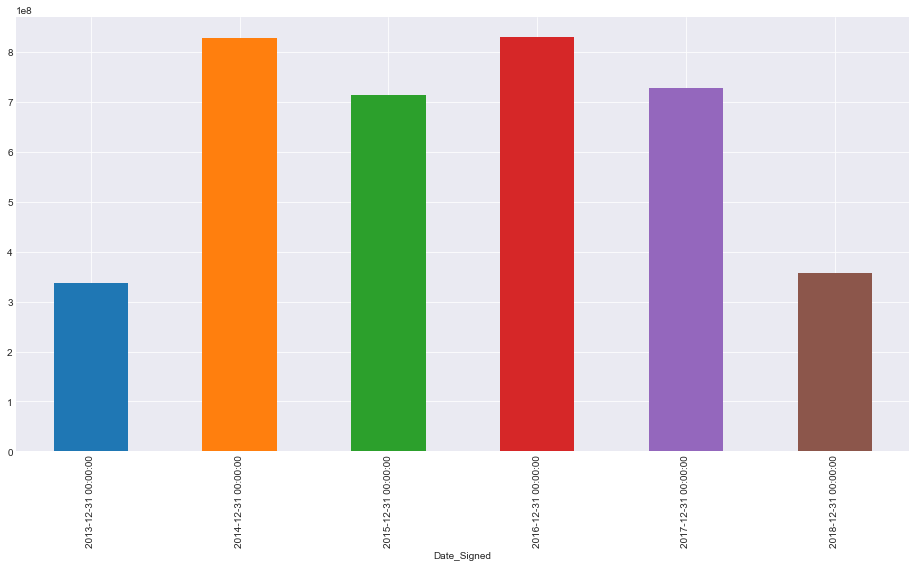

In [170]:
date_val = pd.DataFrame(buy[['Action_Obligation', 'Date_Signed']])
date_val.index = date_val['Date_Signed']
del date_val['Date_Signed']
dateval_ser = date_val['Action_Obligation']
plt.figure(figsize=(16,8))
dateval_ser.resample('Y').sum().plot(kind='bar')

In [47]:
min(buy['Date_Signed'])

Timestamp('2013-08-01 00:00:00')

In [48]:
max(buy['Date_Signed'])

Timestamp('2018-07-31 00:00:00')

We can take the annual sum of total contract action obligations to see if there are major spending differences over time or obvious spikes. The first and last year of contracts are not for complete 12-month cycles, therefore we can expect their total spendings to be considerably less, as seen above.

## Deeper questions

As mentioned, the vast majority of this dataset revolves around categorical variables, such as agency, origin country, or product description. These features will provide the most information about the exceptions to this federal spending law. 

This report will pose three general questions about the data and its trends. During the analysis of the features, these questions will be refined to try and discover more specific information. 

1. Are some foreign countries much more prevalent on this list? Is the reason obvious?
2. Do any federal agencies consistently appear on the list to award contracts overseas?
3. What can we learn about the industries and companies awarded on this list? 

#### Are some foreign countries much more prevalent on this list? Is the reason obvious?

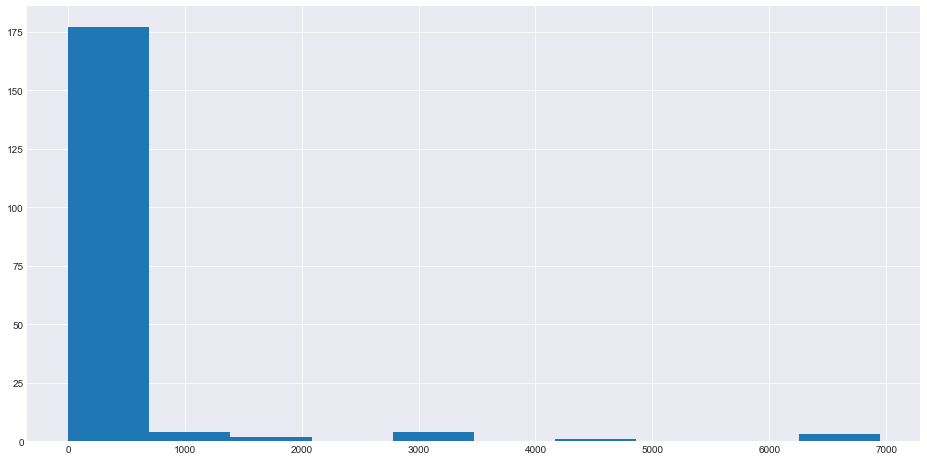

In [157]:
plt.figure(figsize=(16,8))
buy['Country_Origin_Code'].value_counts().hist()

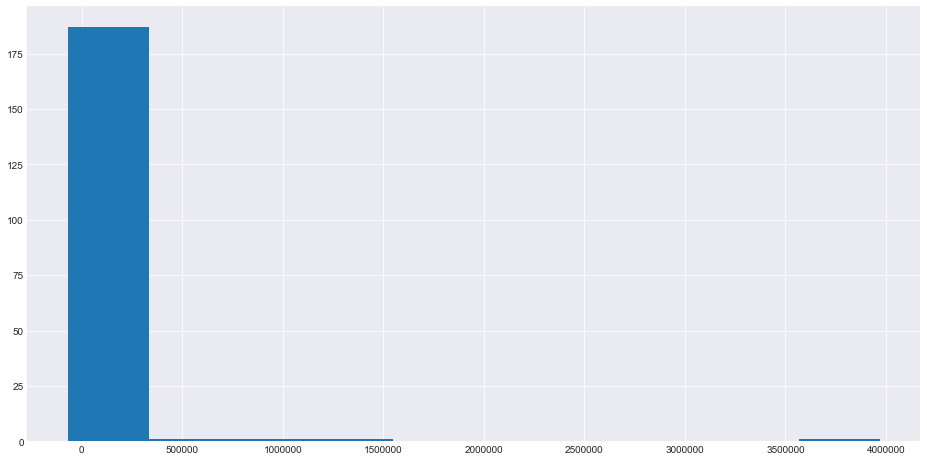

In [160]:
plt.figure(figsize=(16,8))
buy.groupby('Country_Origin_Code')['Total_Contract_Val'].mean().hist()

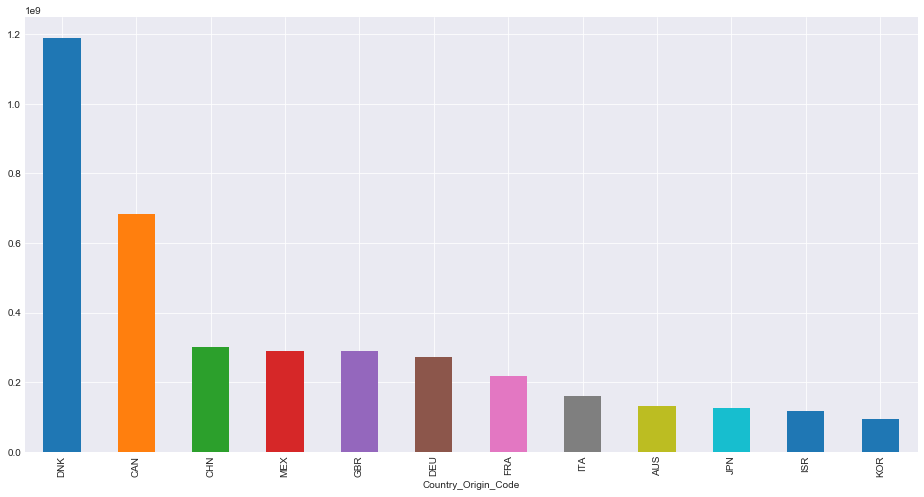

In [181]:
plt.figure(figsize=(16,8))
buy.groupby('Country_Origin_Code')['Total_Contract_Val'].sum().sort_values(ascending=False)[:12].plot(kind='bar')

#### Do some industries consistently rake in more money than others?

In [142]:
contractsum_country = pd.DataFrame(buy.pivot_table(index=['Prod_Service_Desc', 'Country_Origin_Code'],
                                                   aggfunc=sum)['Total_Contract_Val']).unstack()
contractsum_country.head()

Total_Contract_Val          \
Country_Origin_Code                                               ABW     AFG   
Prod_Service_Desc                                                               
ABRASIVE MATERIALS                                                NaN     NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY                  NaN     NaN   
ACCOUNTING AND CALCULATING MACHINES                               NaN     NaN   
ADHESIVES                                                         NaN     NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN...                NaN  7386.0   

                                                                              \
Country_Origin_Code                                AGO AIA ALB       ARE ARG   
Prod_Service_Desc                                                              
ABRASIVE MATERIALS                                 NaN NaN NaN       NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN  13663.37 NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN       NaN NaN   
ADHESIVES                                          NaN NaN NaN       NaN NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN       NaN NaN   

                                                                   ...      \
Country_Origin_Code                                ARM     ASM ATF ... VEN   
Prod_Service_Desc                                                  ...       
ABRASIVE MATERIALS                                 NaN     NaN NaN ... NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN     NaN NaN ... NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN  9195.0 NaN ... NaN   
ADHESIVES                                          NaN     NaN NaN ... NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN     NaN NaN ... NaN   

                                                                            \
Country_Origin_Code                                VGB VNM WSM XKS XQZ YEM   
Prod_Service_Desc                                                            
ABRASIVE MATERIALS                                 NaN NaN NaN NaN NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN NaN NaN NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN NaN NaN NaN   
ADHESIVES                                          NaN NaN NaN NaN NaN NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN NaN NaN NaN   

                                                                
Country_Origin_Code                                ZAF ZMB ZWE  
Prod_Service_Desc                                               
ABRASIVE MATERIALS                                 NaN NaN NaN  
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN  
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN  
ADHESIVES                                          NaN NaN NaN  
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN  

[5 rows x 191 columns]

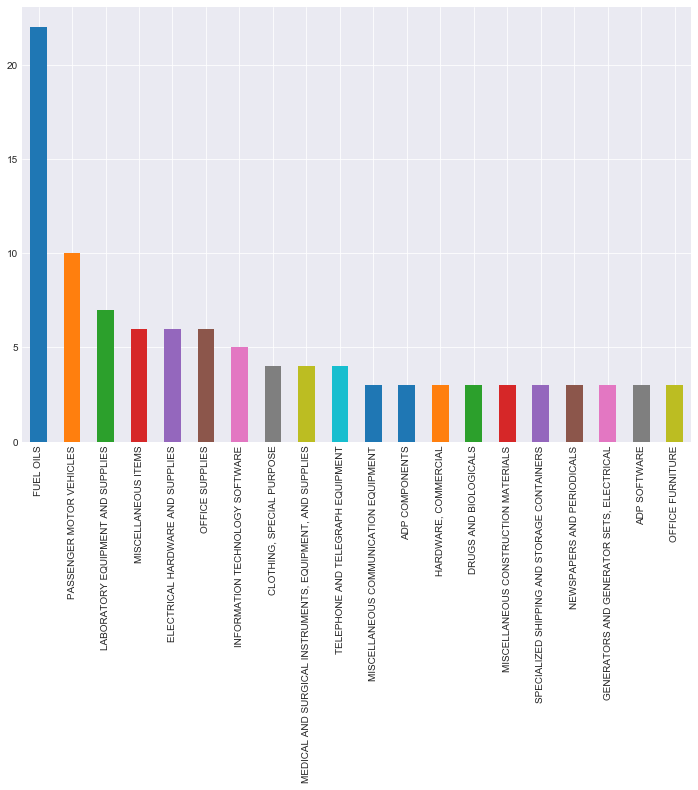

In [148]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=120) # Not quite working yet
contractsum_country.idxmax().value_counts()[:20].plot(kind='bar')

In [43]:
(buy['Country_Origin_Code'].dropna().value_counts() / buy['Country_Origin_Code'].dropna().count()).sort_values(ascending=False)

CHN    0.117362
MEX    0.107932
CAN    0.106006
FRA    0.080252
JPN    0.058470
DEU    0.056661
GBR    0.049716
KOR    0.049226
TWN    0.033392
ZAF    0.024013
CHE    0.022763
IND    0.022627
ITA    0.014668
SGP    0.012961
MYS    0.009159
ISR    0.007723
QAT    0.007419
USA    0.007351
SWE    0.006962
NGA    0.006455
AUS    0.006422
KEN    0.006253
NLD    0.006016
THA    0.005458
GIN    0.005357
IRQ    0.005256
ARE    0.005239
HTI    0.005205
NZL    0.005154
IDN    0.005137
         ...   
ERI    0.000051
TTO    0.000051
IOT    0.000051
MWI    0.000051
SSD    0.000051
ZWE    0.000051
BRN    0.000034
WSM    0.000034
LBN    0.000034
BLR    0.000034
COM    0.000034
COD    0.000034
SHN    0.000034
ATF    0.000034
BDI    0.000034
PRY    0.000034
UZB    0.000017
IRN    0.000017
MUS    0.000017
STP    0.000017
FJI    0.000017
KIR    0.000017
XQZ    0.000017
MNP    0.000017
NIU    0.000017
SYR    0.000017
BMU    0.000017
CYP    0.000017
VAT    0.000017
FRO    0.000017
Name: Country_Origin_Cod